In [1]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

plt.rcParams['figure.figsize'] = (10, 5)

In [2]:
config = {
    "inputData": "/path/to/input/data/*",
    "outDir": "/home/jvdzwaan/data/dilipad/results/all_years-adj-selected_parties_100/{}",
    "nTopics": 100
}

topic_coherence = pd.read_csv(config.get('outDir').format('topic_coherence_100.csv'), index_col=0, encoding='utf-8')
#topic_coherence

In [3]:
topic2cap = dict(topic_coherence['cap_svm'])
print topic2cap

{0: 1, 1: 5, 2: 3, 3: 12, 4: 5, 5: 2, 6: 15, 7: 19, 8: 15, 9: 6, 10: 19, 11: 16, 12: 19, 13: 20, 14: 16, 15: 12, 16: 16, 17: 16, 18: 3, 19: 16, 20: 5, 21: 20, 22: 2, 23: 1, 24: 19, 25: 12, 26: 15, 27: 20, 28: 19, 29: 5, 30: 2, 31: 15, 32: 20, 33: 12, 34: 2, 35: 3, 36: 10, 37: 19, 38: 6, 39: 19, 40: 2, 41: 3, 42: 15, 43: 17, 44: 15, 45: 3, 46: 14, 47: 2, 48: 12, 49: 20, 50: 17, 51: 20, 52: 3, 53: 5, 54: 14, 55: 7, 56: 10, 57: 14, 58: 20, 59: 19, 60: 12, 61: 10, 62: 6, 63: 1, 64: 3, 65: 6, 66: 12, 67: 21, 68: 5, 69: 3, 70: 19, 71: 21, 72: 2, 73: 13, 74: 6, 75: 16, 76: 3, 77: 8, 78: 7, 79: 4, 80: 15, 81: 19, 82: 13, 83: 2, 84: 13, 85: 6, 86: 14, 87: 3, 88: 10, 89: 6, 90: 15, 91: 19, 92: 6, 93: 15, 94: 17, 95: 19, 96: 1, 97: 19, 98: 4, 99: 5}


In [4]:
# is er een topic voor iedere cap code?
from collections import Counter

c = Counter()
d = {}
for topic, cap in topic2cap.iteritems():
    c[cap] += 1
    if not cap in d.keys():
        d[cap] = []
    d[cap].append(topic)
print c.keys()
print c

topic_cap_mapping = pd.concat([pd.Series(d), pd.Series(c)], axis=1)
topic_cap_mapping.columns = ['topics numbers', 'number of topics']

topic_cap_mapping

[1, 2, 3, 4, 5, 6, 7, 8, 10, 12, 13, 14, 15, 16, 17, 19, 20, 21]
Counter({19: 13, 3: 10, 15: 9, 2: 8, 6: 8, 5: 7, 12: 7, 20: 7, 16: 6, 1: 4, 10: 4, 14: 4, 13: 3, 17: 3, 4: 2, 7: 2, 21: 2, 8: 1})


,topics numbers,number of topics
1,"[0, 23, 63, 96]",4
2,"[5, 22, 30, 34, 40, 47, 72, 83]",8
3,"[2, 18, 35, 41, 45, 52, 64, 69, 76, 87]",10
4,"[79, 98]",2
5,"[1, 4, 20, 29, 53, 68, 99]",7
6,"[9, 38, 62, 65, 74, 85, 89, 92]",8
7,"[55, 78]",2
8,[77],1
10,"[36, 56, 61, 88]",4
12,"[3, 15, 25, 33, 48, 60, 66]",7


In [5]:
# is er een high quality topic voor iedere cap code?
print '# of high quality topics', np.sum(topic_coherence['NPMI'] > topic_coherence['NPMI'].mean())
print 'mean NMPI score', topic_coherence['NPMI'].mean()

c = Counter()
hq = {}
for i, h in enumerate(topic_coherence['NPMI'] > topic_coherence['NPMI'].mean()):
    if h:
        cap = topic2cap[i]
        c[cap] += 1
        if not cap in hq.keys():
            hq[cap] = []
        hq[cap].append(i)
print hq.keys()
print hq
print c

topic_cap_mapping['high quality topics'] = pd.Series(hq)
topic_cap_mapping['number of high quality topics'] = pd.Series(c)
topic_cap_mapping = topic_cap_mapping.fillna(0)
topic_cap_mapping[['number of topics', 'number of high quality topics']]

# of high quality topics 48
mean NMPI score -0.1633153
[2, 3, 4, 5, 6, 7, 10, 12, 13, 14, 15, 16, 17, 19, 20]
{2: [5, 22, 30, 34, 40, 47, 72], 3: [41, 64, 69], 4: [98], 5: [1, 29, 68, 99], 6: [62, 65, 89, 92], 7: [55, 78], 10: [56, 88], 12: [3, 15, 25, 66], 13: [73], 14: [54, 86], 15: [6, 31, 93], 16: [11, 17, 19], 17: [43, 50], 19: [7, 12, 37, 59, 70, 81, 91, 95, 97], 20: [21]}
Counter({19: 9, 2: 7, 5: 4, 6: 4, 12: 4, 3: 3, 15: 3, 16: 3, 7: 2, 10: 2, 14: 2, 17: 2, 4: 1, 13: 1, 20: 1})


,number of topics,number of high quality topics
1,4,0
2,8,7
3,10,3
4,2,1
5,7,4
6,8,4
7,2,2
8,1,0
10,4,2
12,7,4


In [6]:
def latexify(fig_width=None, fig_height=None, columns=1):
    """Set up matplotlib's RC params for LaTeX plotting.
    Call this before plotting a figure.

    Parameters
    ----------
    fig_width : float, optional, inches
    fig_height : float,  optional, inches
    columns : {1, 2}
    """

    # code adapted from http://www.scipy.org/Cookbook/Matplotlib/LaTeX_Examples

    # Width and max height in inches for IEEE journals taken from
    # computer.org/cms/Computer.org/Journal%20templates/transactions_art_guide.pdf

    assert(columns in [1,2])

    if fig_width is None:
        fig_width = 3.39 if columns==1 else 6.9 # width in inches

    if fig_height is None:
        golden_mean = (sqrt(5)-1.0)/2.0    # Aesthetic ratio
        fig_height = fig_width*golden_mean # height in inches

    MAX_HEIGHT_INCHES = 8.0
    if fig_height > MAX_HEIGHT_INCHES:
        print("WARNING: fig_height too large:" + fig_height + 
              "so will reduce to" + MAX_HEIGHT_INCHES + "inches.")
        fig_height = MAX_HEIGHT_INCHES

    params = {'backend': 'ps',
              'text.latex.preamble': ['\usepackage{gensymb}'],
              'axes.labelsize': 12, # fontsize for x and y labels (was 10)
              'axes.titlesize': 12,
              'text.fontsize': 12, # was 10
              'legend.fontsize': 12, # was 10
              'xtick.labelsize': 12,
              'ytick.labelsize': 12,
              'text.usetex': True,
              'figure.figsize': [fig_width,fig_height],
              'font.family': 'serif'
    }

    matplotlib.rcParams.update(params)


def format_axes(ax):

    for spine in ['top', 'right']:
        ax.spines[spine].set_visible(False)

    for spine in ['left', 'bottom']:
        ax.spines[spine].set_color(SPINE_COLOR)
        ax.spines[spine].set_linewidth(0.5)

    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')

    for axis in [ax.xaxis, ax.yaxis]:
        axis.set_tick_params(direction='out', color=SPINE_COLOR)

    return ax


['#2b8cbe', '#a6bddb']


/usr/local/lib/python2.7/dist-packages/matplotlib/__init__.py:872: UserWarning: text.fontsize is deprecated and replaced with font.size; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))
/usr/local/lib/python2.7/dist-packages/pandas/tools/plotting.py:927: UserWarning: 'colors' is being deprecated. Please use 'color'instead of 'colors'
  warnings.warn(("'colors' is being deprecated. Please use 'color'"


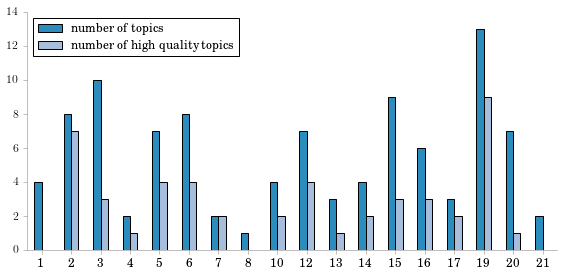

In [7]:
from math import sqrt

SPINE_COLOR = 'gray'

# colors from colorbrewer 3 class pubu
colors = ['#2b8cbe', '#a6bddb']
print colors

latexify(8,4)
plt.figure(1)
topic_cap_mapping[['number of topics', 'number of high quality topics']].plot(kind='bar', colors=colors)
axes = plt.gca()
format_axes(axes)
for tick in axes.get_xticklabels():
    tick.set_rotation(0)
#axes.set_ylim([0,8])
#axes.set_yticklabels(['']+list(df.name))
#axes.set_xlim([0,5500])
#axes.set_xticks(range(0, 5500, 365*2))
#axes.set_xticklabels([str(x) for x in range(1998, 2014, 2)])
plt.tight_layout()
plt.savefig("/home/jvdzwaan/Dropbox/Publications/Papers/Dilipad/latex/images/cap_vragenuurtje_parties.pdf")